# Tittle : AirBnb

In [ ]:
# importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# importing drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colab extfiles/Copy of Airbnb NYC 2019.csv",encoding = 'latin')

#Understanding Data

In [ ]:
#looking first 5 rows
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#looking last 5 rows
dataset.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
dataset.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#Insights of Data

In [ ]:
dataset.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [ ]:
dataset.shape

(48895, 16)

#Data Cleaning

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [ ]:
# checking null values existed or not
dataset.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
num=dataset['name'].mode()[0]
dataset["name"].fillna(num, inplace=True)

In [ ]:
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
a=dataset["host_name"].mode()[0]
dataset["host_name"].fillna(a,inplace=True)

In [ ]:
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
b=dataset["reviews_per_month"].mode()[0]
dataset["reviews_per_month"].fillna(b,inplace=True)

In [ ]:
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
c=dataset["last_review"].mode()[0]
dataset["last_review"].fillna(c,inplace=True)

In [ ]:
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#EDA for Dependent variables

#prices of the Room

In [ ]:
dataset['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [ ]:
dataset['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

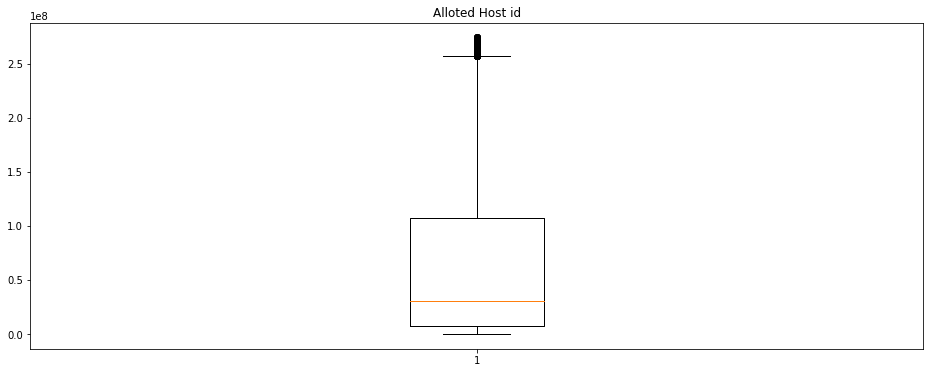

In [ ]:
plt.figure(figsize=(16,6))
plt.boxplot(dataset['host_id'])
plt.title("Alloted Host id")
plt.show()

The box plot explains the alloted Hosts with the unique id.


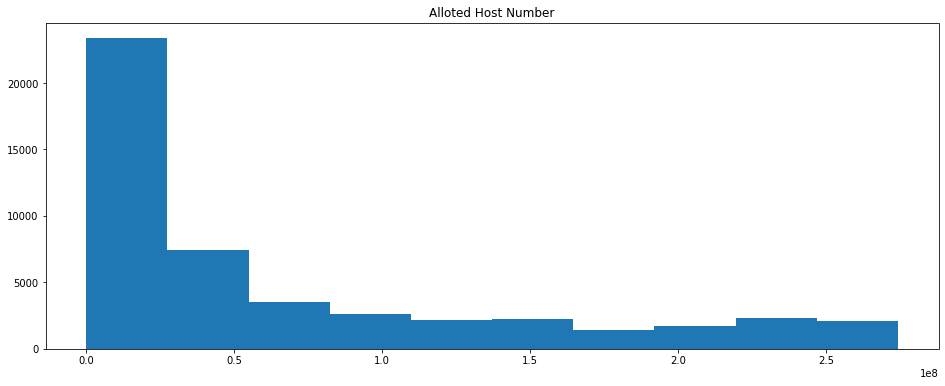

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(dataset['host_id'])
plt.title("Alloted Host Number")
plt.show()

The  graph explains the alloted hosts members with unique host id.
Mostly the alloted hosts are in range of 0 to 0.5

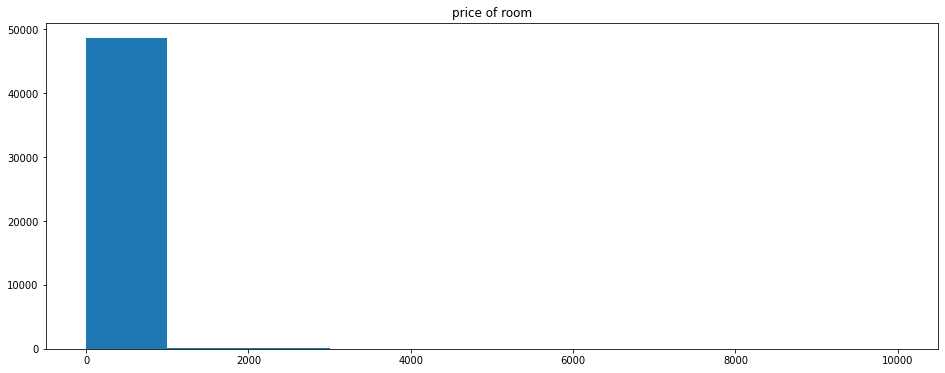

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(dataset['price'])
plt.title("price of room")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


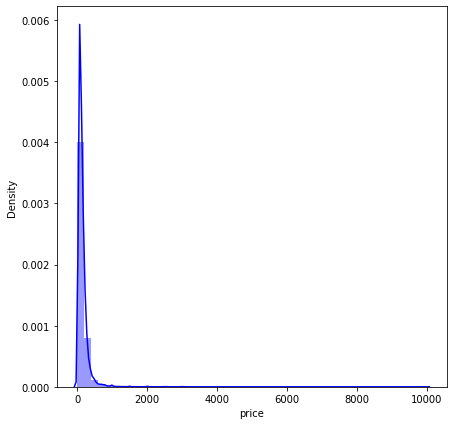

In [ ]:
plt.figure(figsize=(7,7))
sb.distplot(dataset['price'],color="b")
plt.show()

The above graph explains about the price distributions.

The price is mostly in range of 0 to 1000.

The high price is in between 0 t0 500.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


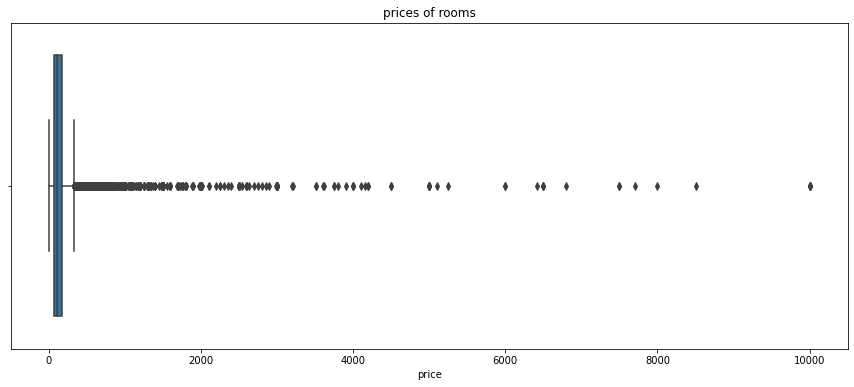

In [ ]:
plt.figure(figsize=(15,6))
sb.boxplot(dataset['price'])
plt.title("prices of rooms")
plt.show()

The box plot explains the price distributions of the dataset which is in range of 0 to 1000.

In [ ]:
# writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)

 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(dataset['price'])

In [ ]:
dataset[(dataset.price < lower_bound) | (dataset.price > upper_bound)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,2019-06-23,0.02,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,2019-06-23,0.02,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,2019-06-23,0.02,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,2019-06-23,0.02,1,9


In [ ]:
# deriving the Data used only that is within the IQR
df_subset = dataset[(dataset.price>lower_bound) & (dataset.price<upper_bound)]

<AxesSubplot:>

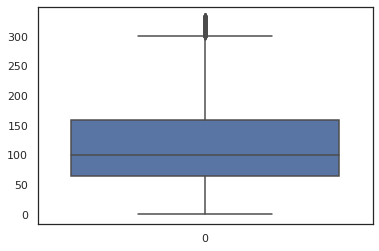

In [ ]:
sb.boxplot(data = df_subset['price'])

The above boxplot explains the price after removing the outliers.

The range of price is 0 to 300 and the median price is 100.



In [ ]:
dataset["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The price of rooms for occupied room is in between 0 to 2000

In [ ]:
dataset['price'].max()

10000

In [ ]:
dataset['price'].min()

0

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


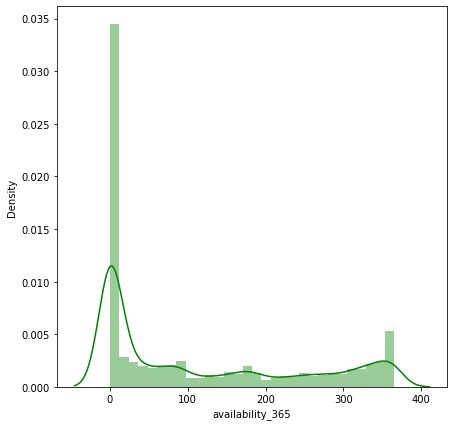

In [ ]:
plt.figure(figsize=(7,7))
sb.distplot(dataset['availability_365'],color="g")
plt.show()

#Reviews

In [ ]:
dataset["number_of_reviews"].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


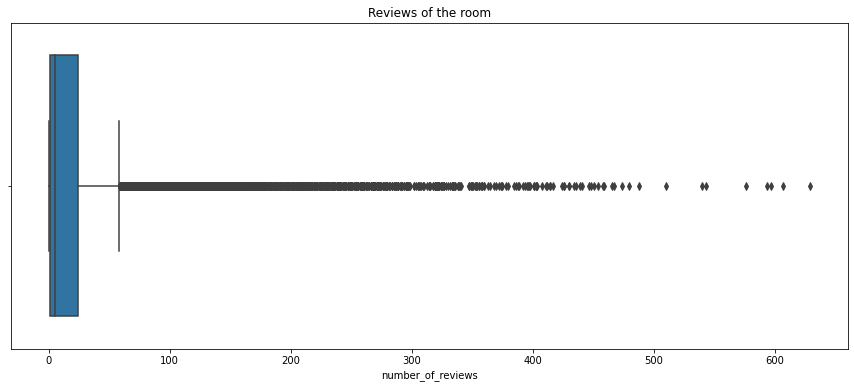

In [ ]:
plt.figure(figsize=(15,6))
sb.boxplot(dataset['number_of_reviews'])
plt.title("Reviews of the room")
plt.show()

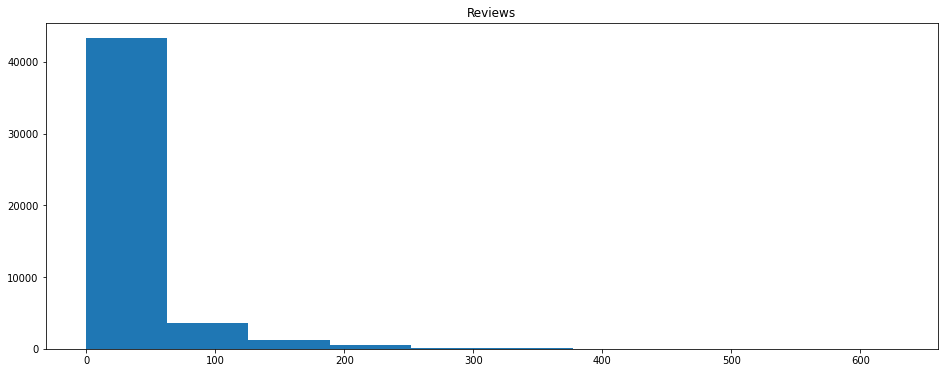

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(dataset['number_of_reviews'])
plt.title("Reviews")
plt.show()

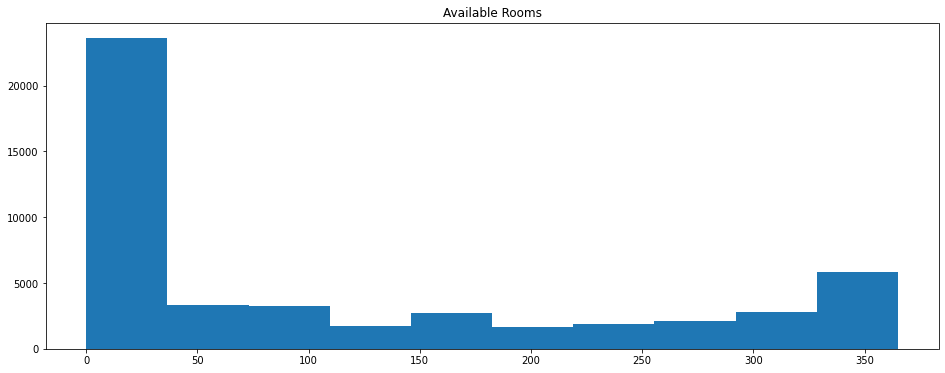

In [ ]:
plt.figure(figsize=(16,6))
plt.hist(dataset['availability_365'])
plt.title("Available Rooms")
plt.show()

#Exploring the Numerical Values

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

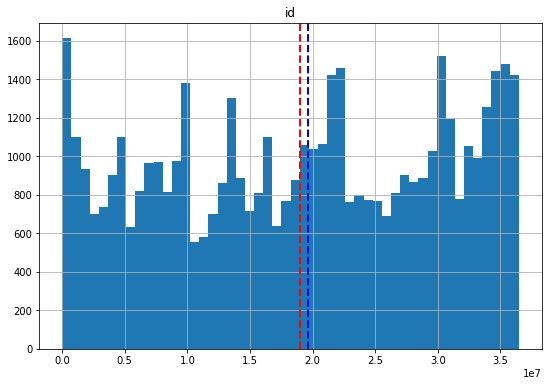

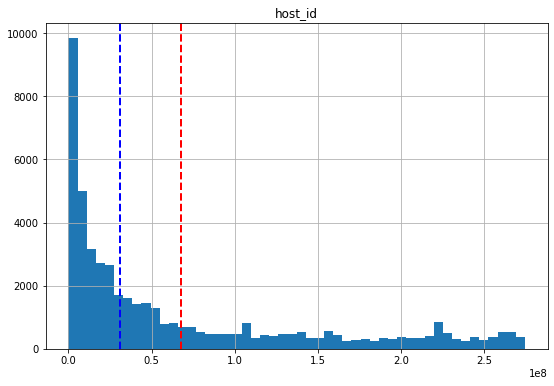

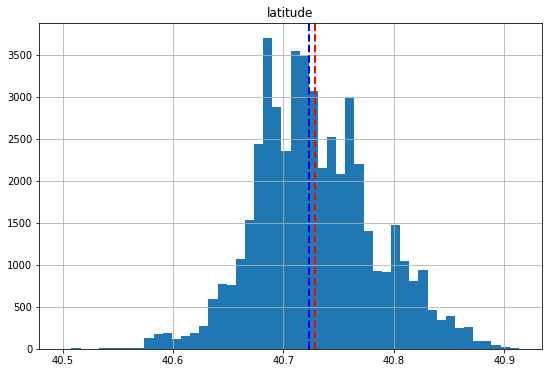

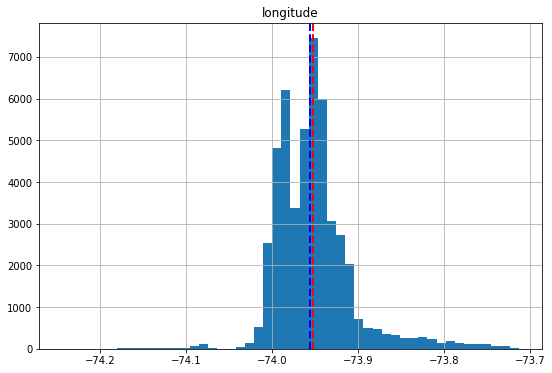

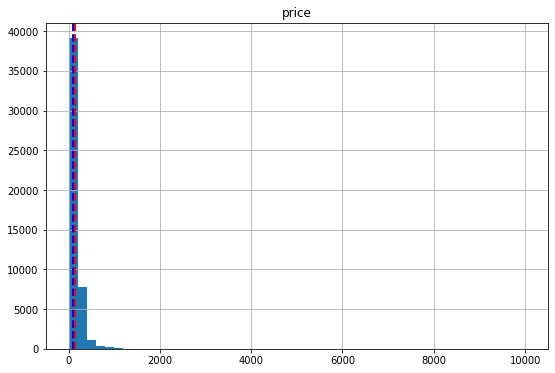

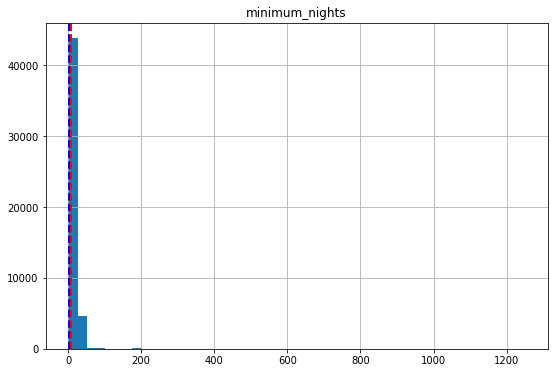

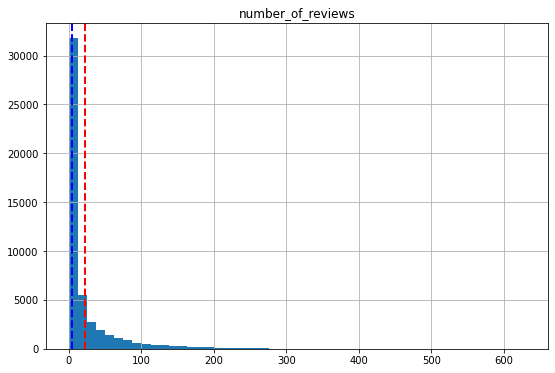

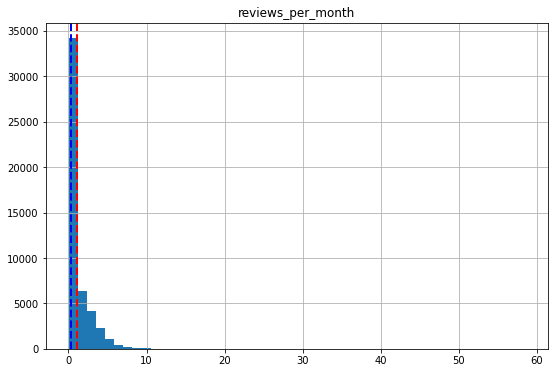

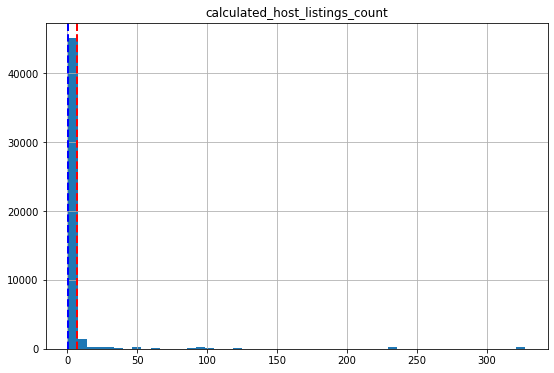

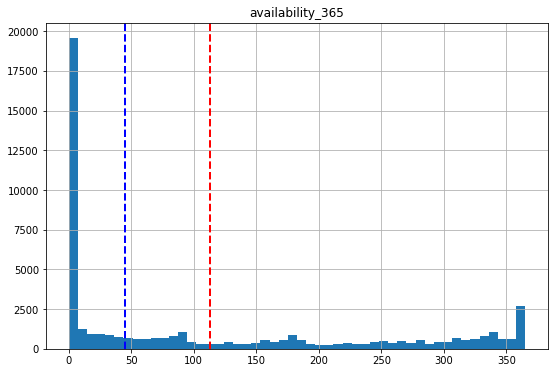

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

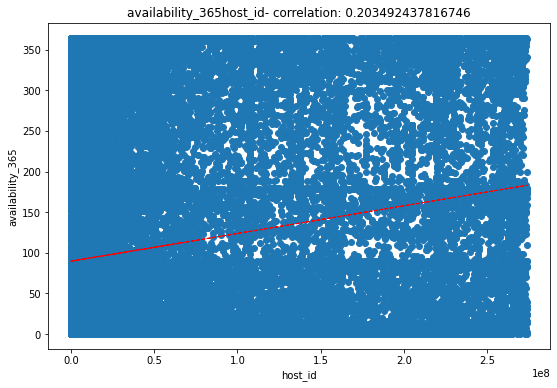

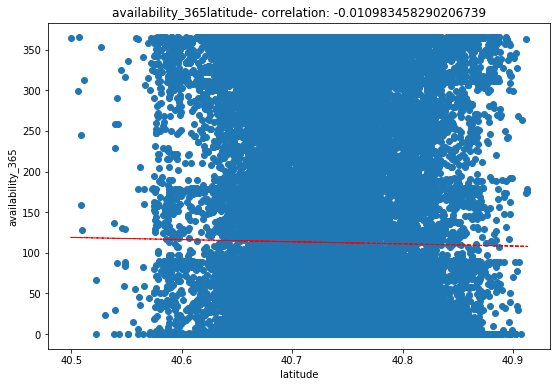

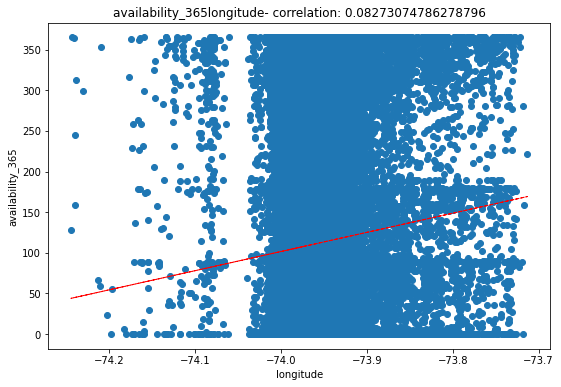

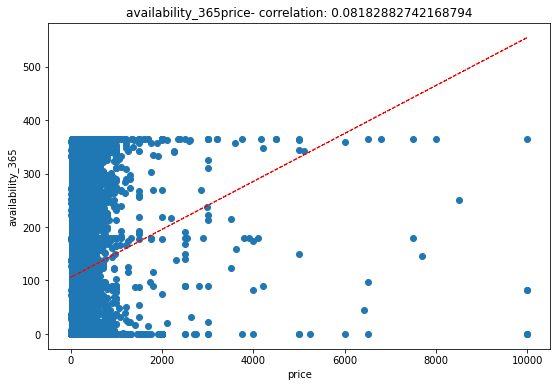

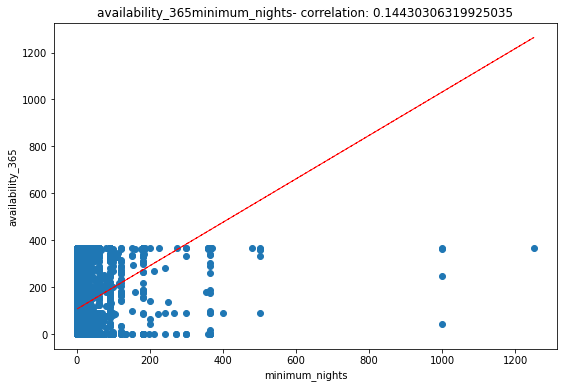

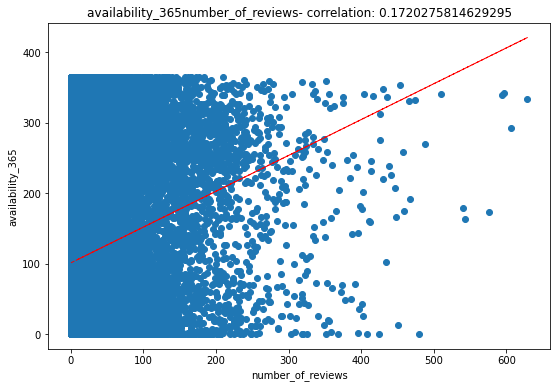

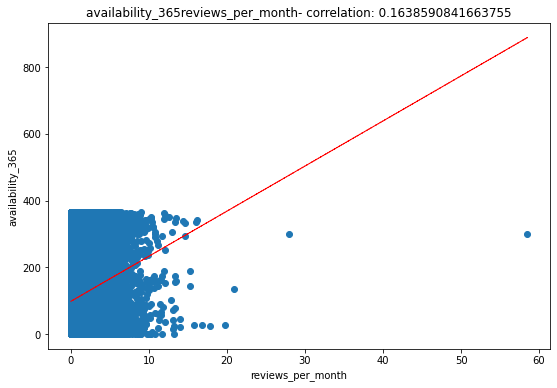

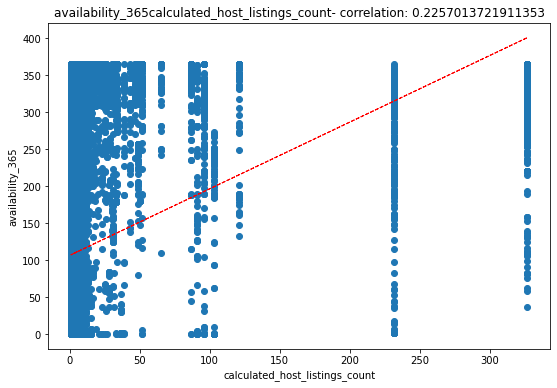

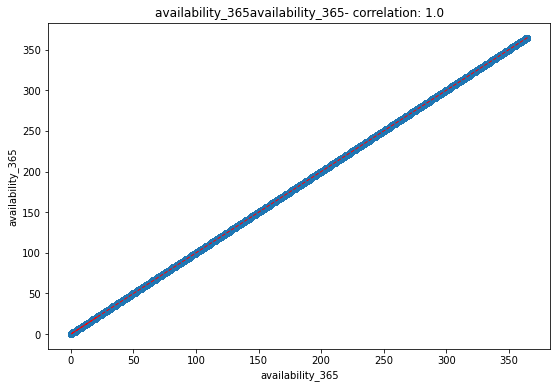

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['availability_365']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('availability_365')
    ax.set_title('availability_365' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['availability_365'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)
plt.show()

Exploaring categorical DATA

In [ ]:
cd=["neighbourhood_group","room_type","price","availability_365"]

In [ ]:
for col in cd[:]:
    counts = dataset[col].value_counts()
    print(counts)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64


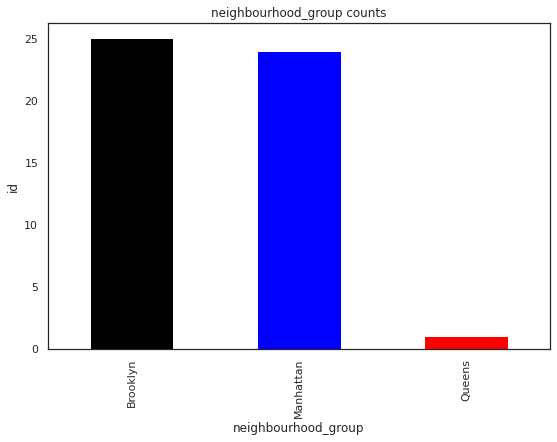

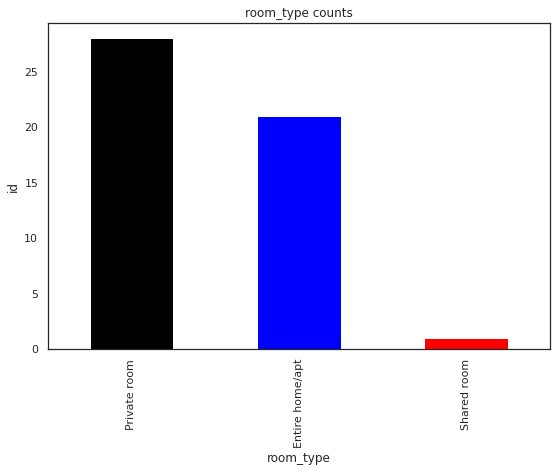

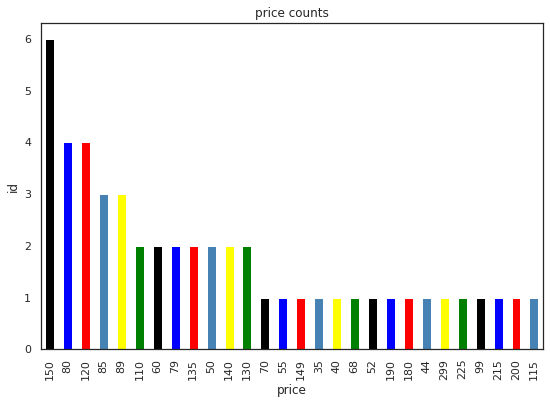

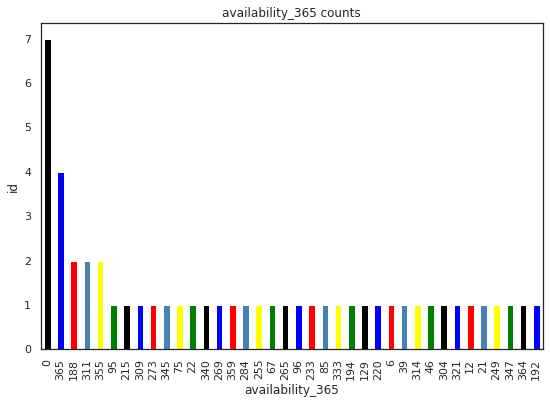

In [ ]:
for col in cd[:]:
    counts = dataset[col].head(50).value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color={'red',"blue","green","yellow",'steelblue',"black"})
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("id")
plt.show()

In [ ]:
dataset[["neighbourhood_group","availability_365","price"]].groupby("neighbourhood_group").count()

,availability_365,price
neighbourhood_group,,
Bronx,1091,1091
Brooklyn,20104,20104
Manhattan,21661,21661
Queens,5666,5666
Staten Island,373,373


<AxesSubplot:xlabel='availability_365', ylabel='neighbourhood_group'>

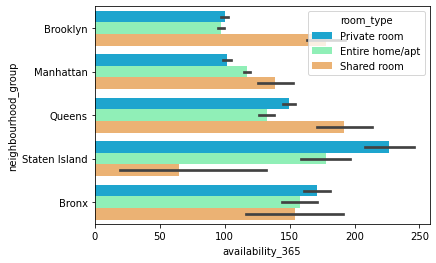

In [ ]:
sb.barplot(y="neighbourhood_group",x="availability_365",hue='room_type',data=dataset,palette='rainbow')

Brooklyn has the less availability with private and Entire home room type and the Staten Island has high availability with private and Entire home type.

<AxesSubplot:>

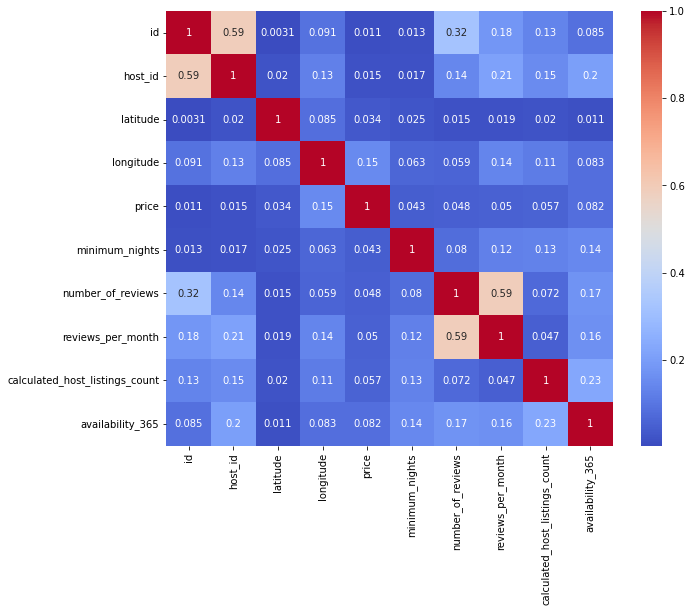

In [ ]:
 ## Correlation
plt.figure(figsize=(10,8))
correlation = dataset.corr()
sb.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The above heat map helps us understand the correlation between the variables.

In [ ]:
dataset.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
avg_preffered_price_df = dataset.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean()
avg_preffered_price_df

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
avg_bookings = dataset.groupby(['neighbourhood_group','room_type'], as_index=False)["host_id"].mean()
avg_bookings

,neighbourhood_group,room_type,host_id
0,Bronx,Entire home/apt,1.037373e+08
1,Bronx,Private room,1.060786e+08
2,Bronx,Shared room,1.123450e+08
3,Brooklyn,Entire home/apt,4.861704e+07
4,Brooklyn,Private room,6.242636e+07
5,Brooklyn,Shared room,1.040423e+08
6,Manhattan,Entire home/apt,6.557697e+07
7,Manhattan,Private room,6.982314e+07
8,Manhattan,Shared room,9.666720e+07
9,Queens,Entire home/apt,8.713280e+07


In [ ]:

#Unstack the group by information for plot the graph
avg_preffered_price_df = dataset.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


<AxesSubplot:xlabel='neighbourhood_group'>

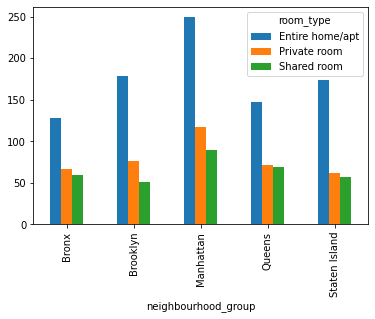

In [ ]:
avg_preffered_price_df.plot.bar()

Manhattan has the high average price with Entire home, private and shared room type.

Booklyn is the second highest average price with Entire home type but it has the low average price with shared room type.



array([<AxesSubplot:ylabel='Entire home/apt'>,
       <AxesSubplot:ylabel='Private room'>,
       <AxesSubplot:ylabel='Shared room'>], dtype=object)

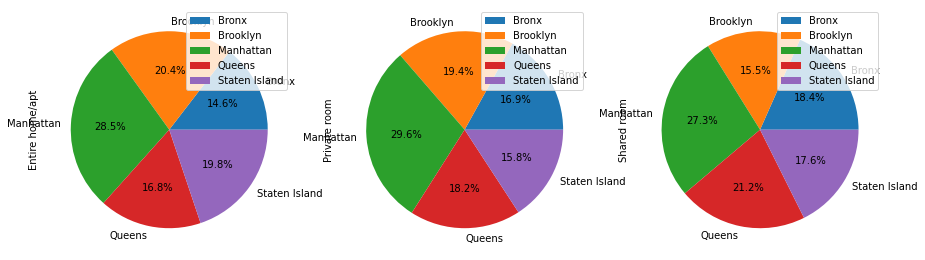

In [ ]:
avg_preffered_price_df.plot(kind="pie",subplots=True,figsize=(15,10),autopct="%1.1f%%")

The above pie chart and bar plot explains the average of the prices.

Manhattan has the highest price among all the neighbourhood in all room types.

Brooklyn has the high price in private and entire home but the average price in shared is low.

Queens has the high average price in shared room but less in other types.

#Number of active host per location (Where most of the host focused to own property)

In [ ]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = dataset.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False)
no_of_host_per_location

,neighbourhood_group,host_id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = dataset.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

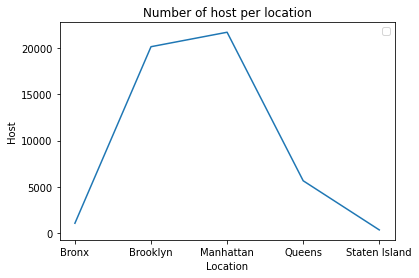

In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

The above plot shows how many number of hosts are staying in the location.

In [ ]:

#identify the observations where minimum nights is 1 and price is minimum
dataset[dataset['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,2019-06-23,0.02,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.68,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,2019-06-23,0.02,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,2019-06-23,0.02,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,2019-06-23,0.02,12,146


Where the customer pays the highest and lowest rent according to location

In [ ]:
max_price_df = dataset.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns={'neighbourhood_group':"Location",'price':"Maximum price"})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [ ]:
#Get the lowest rent according to location
min_price_df = dataset.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns={'neighbourhood_group':"Location",'price':"Minimum price"})
min_price_df

,Location,Minimum price
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,10
4,Staten Island,13


In [ ]:
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,0
1,Manhattan,10000,0
2,Queens,10000,10
3,Staten Island,5000,13
4,Bronx,2500,0


In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()

In [ ]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [ ]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

<ipython-input-130-ecbb41002487>:4: RuntimeWarning: divide by zero encountered in log2
  new_max_price = np.log2(values)


In [ ]:
#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,-inf
1,Manhattan,13.287712,-inf
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,3.700440
4,Bronx,11.287712,-inf


Text(0.5, 1.0, 'Maximum and minimum price according to location')

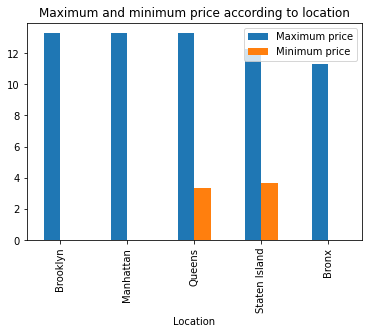

In [ ]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

The above plot explains the max and min price of the rooms of different neighbourehood.

#Finding Relation between neighbourhood group and availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

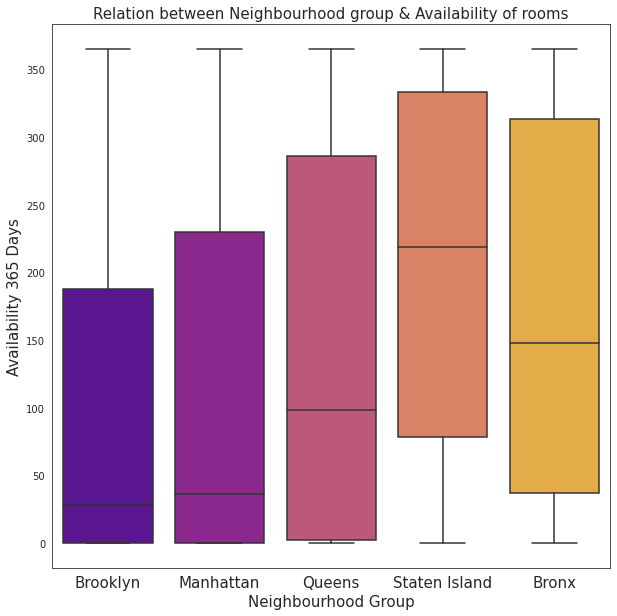

In [ ]:

plt.figure(figsize=(10,10))
sb.set_style('white')
ax = sb.boxplot(data=dataset, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

The above figure explains neighbourhood_group vs Availability of Rooms

From the above figure Brooklyn has the least availability followed by Manhattan based on the distribution of availability of the room.

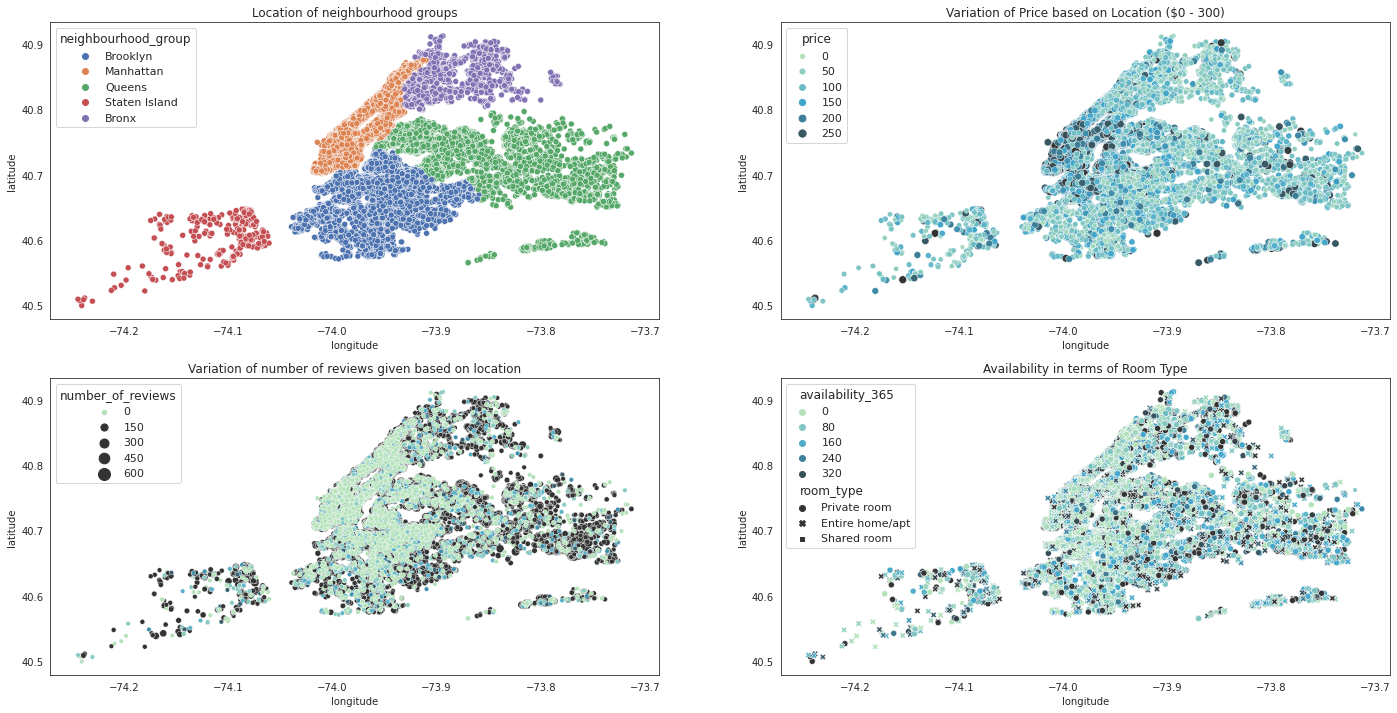

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
ax = axes.flatten()

sb.set_theme(style="white")
sb.scatterplot(data=dataset, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[0]);
ax[0].set_title('Location of neighbourhood groups')
sb.scatterplot(data=dataset[dataset['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='GnBu_d', ax=ax[1])
ax[1].set_title('Variation of Price based on Location ($0 - 300)')
sb.scatterplot(data=dataset, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[2])
ax[2].set_title('Variation of number of reviews given based on location')
sb.scatterplot(data=dataset, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[3])
ax[3].set_title('Availability in terms of Room Type')
plt.show()

From the above plots

1.First figure shows the neighbourhood lives on which locations.

2.Second figure shows prices of the rooms in different hotels.

3.Third fogure shows number of reviews of the hotels.

4.Fourth figures shows that the availability of rooms and type of rooms.

#Finding Top most used words from listing names

In [ ]:

#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in dataset.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [ ]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:20]

[('in', 16733),
 ('room', 9390),
 ('bedroom', 7231),
 ('private', 6988),
 ('apartment', 6113),
 ('cozy', 4635),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3390),
 ('1', 3358),
 ('with', 3092),
 ('2', 3080),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820)]

In [ ]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_cleaned = [e for e in count_words if e not in items_to_remove]
top = top_cleaned[:20]
top

[('room', 9390),
 ('bedroom', 7231),
 ('private', 6988),
 ('apartment', 6113),
 ('cozy', 4635),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3390),
 ('1', 3358),
 ('with', 3092),
 ('2', 3080),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2537),
 ('beautiful', 2321),
 ('near', 2295)]

In [ ]:
#converting the data into DataFrame
word_count_df = pd.DataFrame(top)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,room,9390
1,bedroom,7231
2,private,6988
3,apartment,6113
4,cozy,4635
5,studio,3772
6,brooklyn,3629
7,apt,3571
8,spacious,3390
9,1,3358


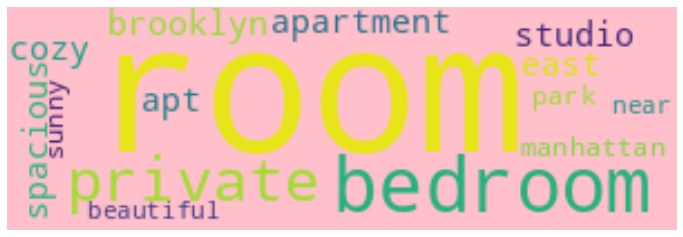

In [ ]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80,background_color="pink",width=300, height=100).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The above figure shows the top 15 words used in the project.